<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/22-DBSCAN/DBSCAN_Project_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN Project Exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('/content/wholesome_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## EDA

<Axes: xlabel='Milk', ylabel='Grocery'>

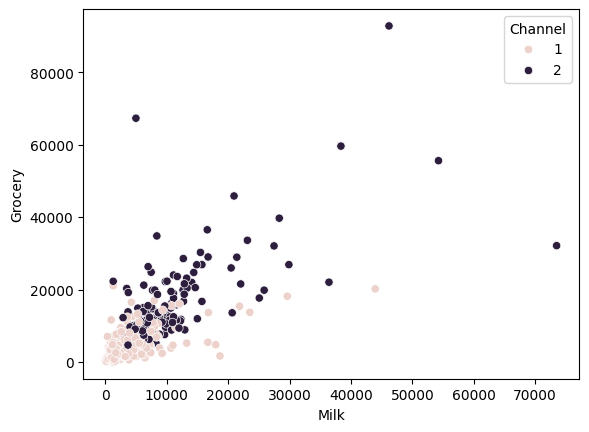

In [4]:
sns.scatterplot(df, x='Milk', y='Grocery', hue='Channel')

<Axes: xlabel='Milk', ylabel='Count'>

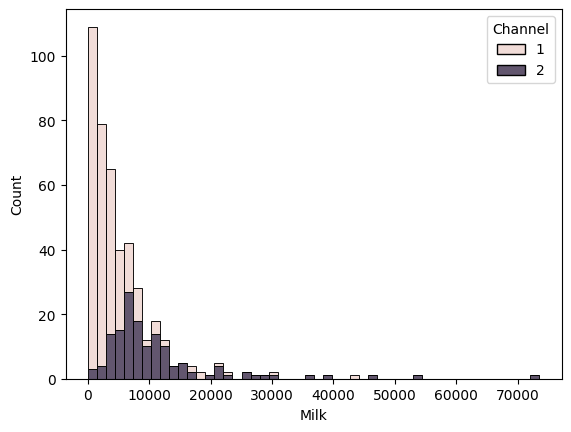

In [8]:
sns.histplot(df, x='Milk', hue='Channel', multiple='stack')

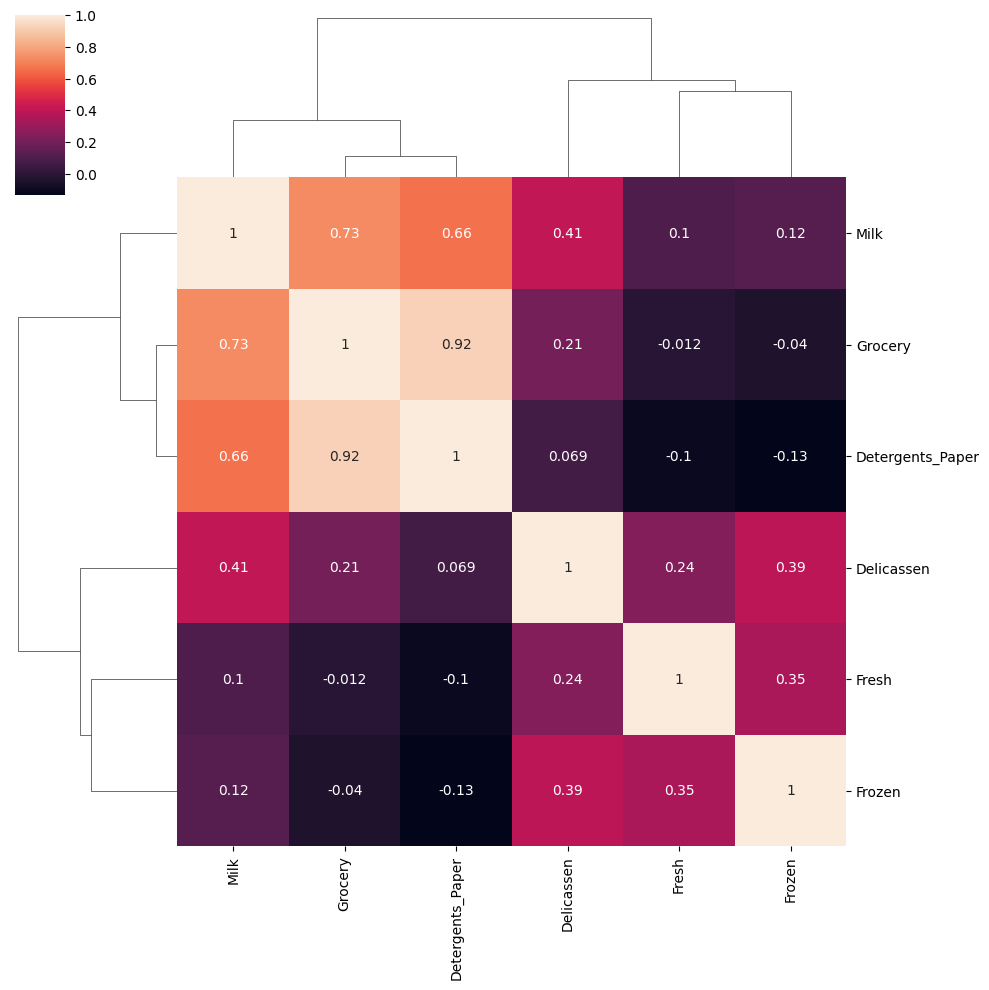

In [10]:
sns.clustermap(df.drop(['Channel', 'Region'], axis=1).corr(), annot=True)

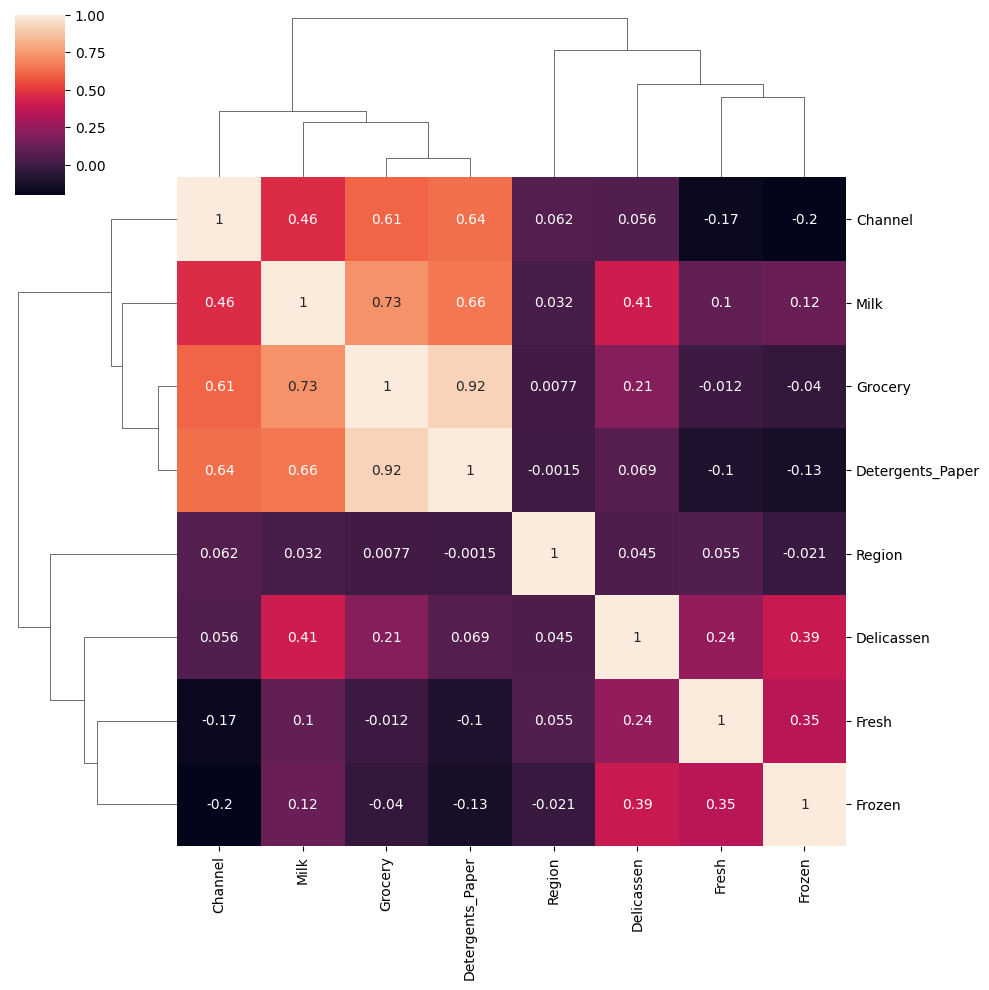

In [11]:
sns.clustermap(df.corr(), annot=True)

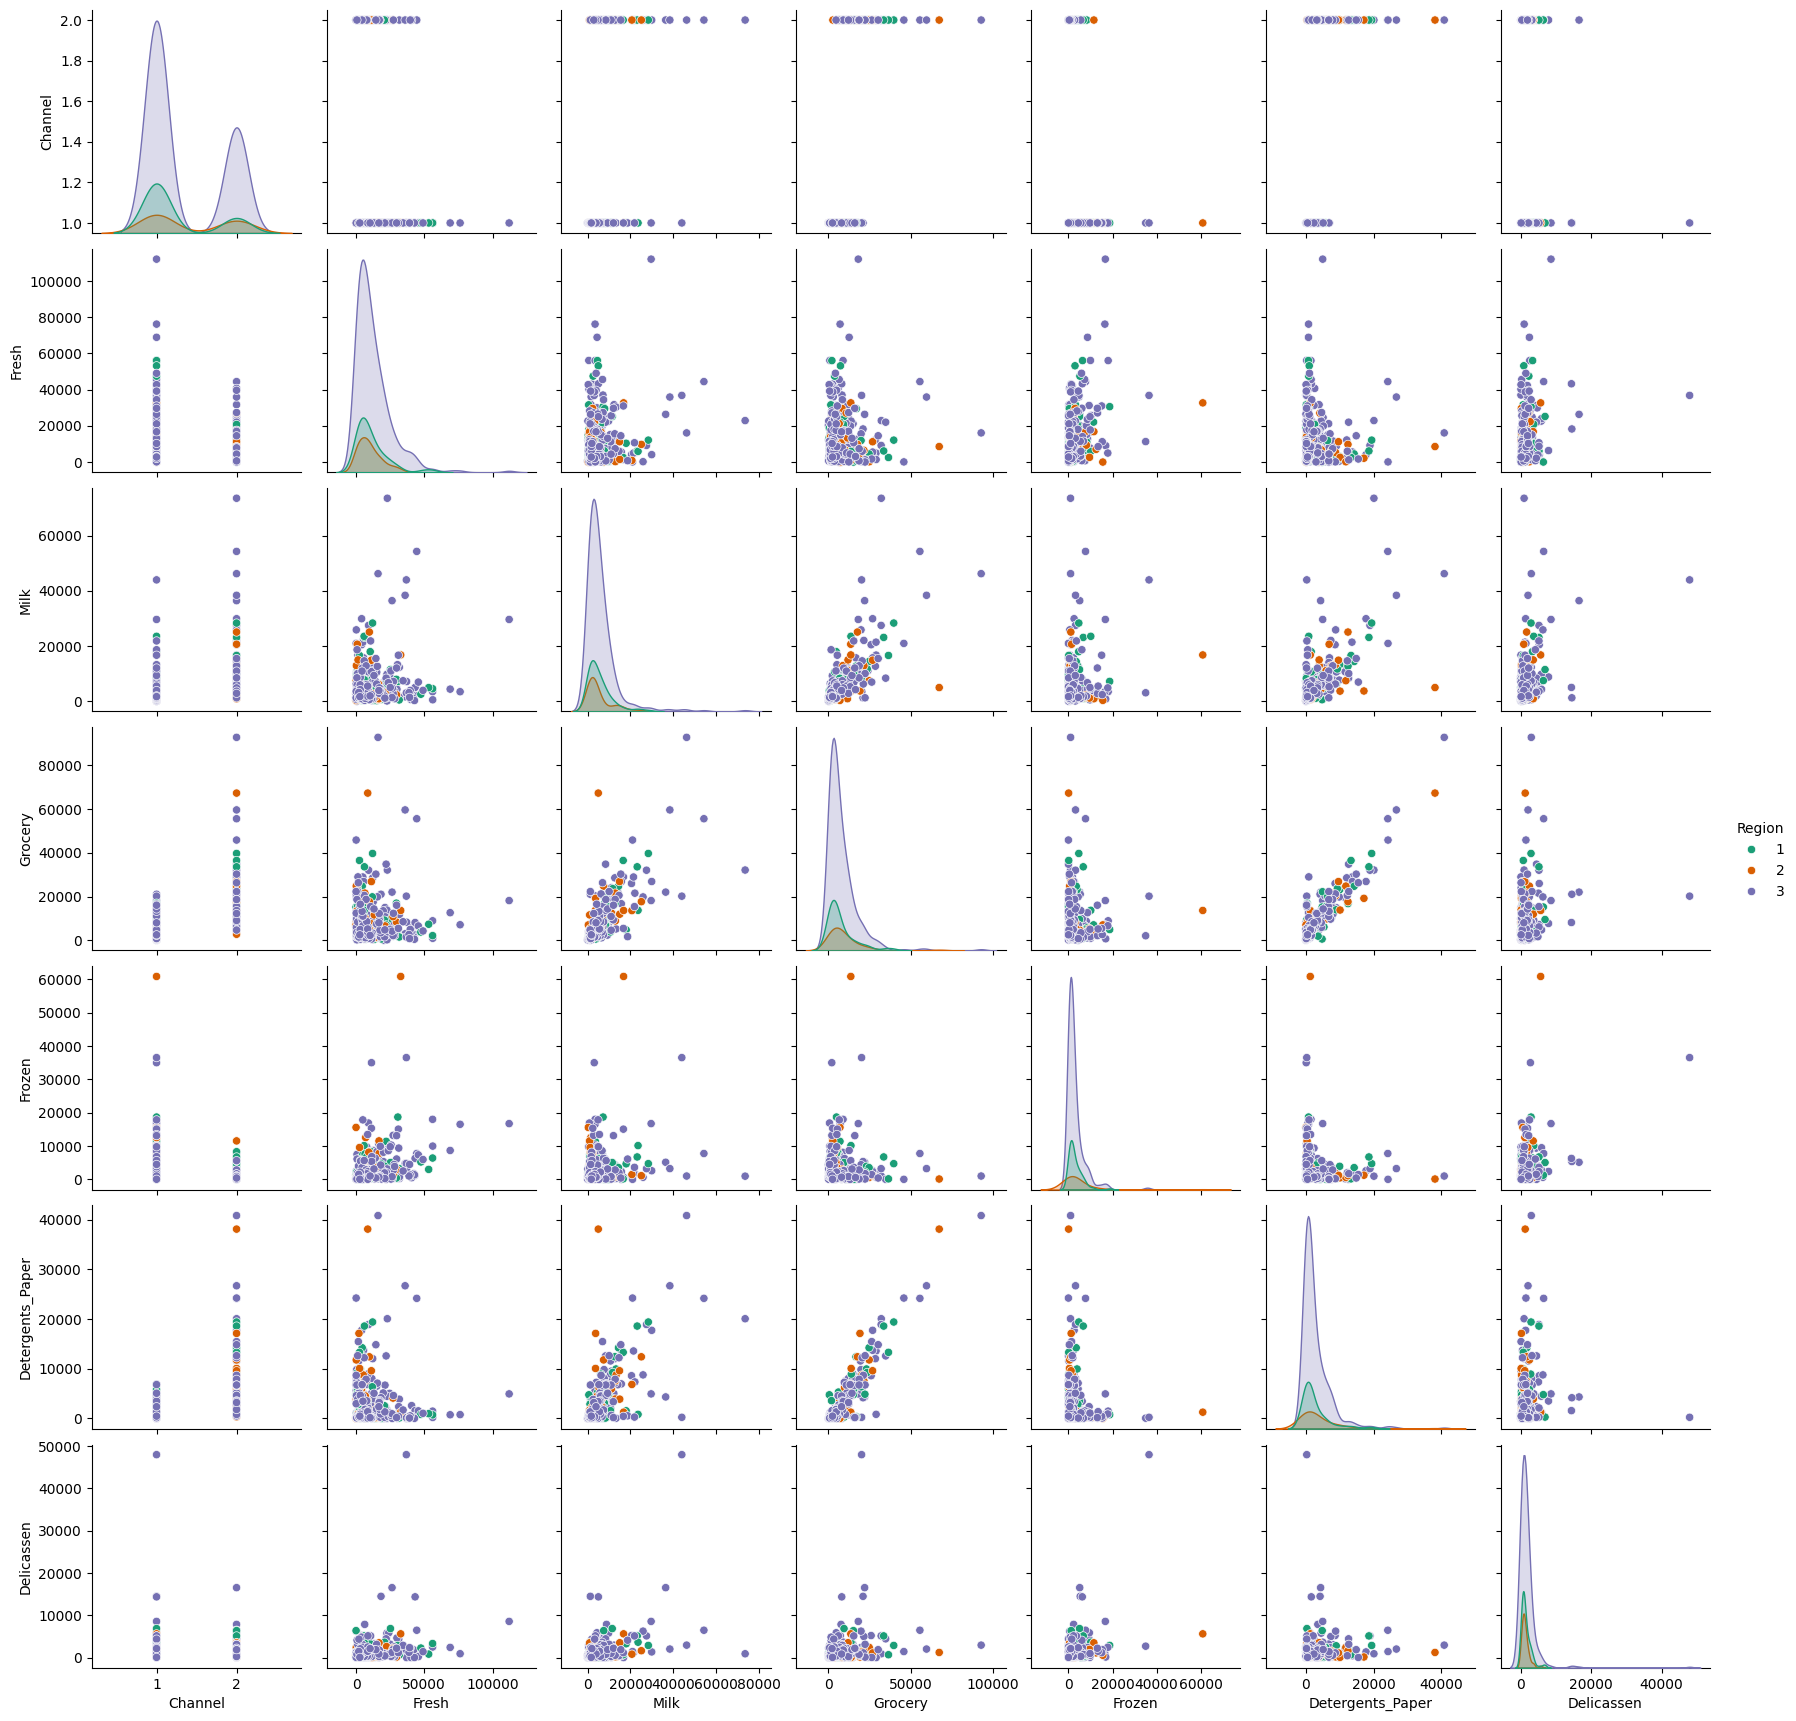

In [13]:
sns.pairplot(df, hue='Region', palette='Dark2')

## DBSCAN

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [15]:
df.shape

(440, 8)

In [16]:
X_scaled.shape

(440, 8)

In [17]:
out_per = []

for eps in np.linspace(0.001, 3, 50):
  dbscan = DBSCAN(eps, min_samples=2*df.shape[1])
  dbscan.fit(X_scaled)

  per_out = 100*np.sum(dbscan.labels_==-1)/len(dbscan.labels_)
  out_per.append(per_out)

Text(0.5, 0, 'Epsilon Value')

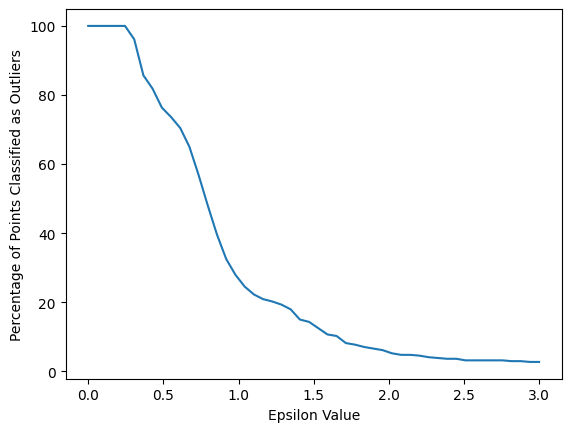

In [19]:
sns.lineplot(x=np.linspace(0, 3), y=out_per)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

<Axes: xlabel='Milk', ylabel='Grocery'>

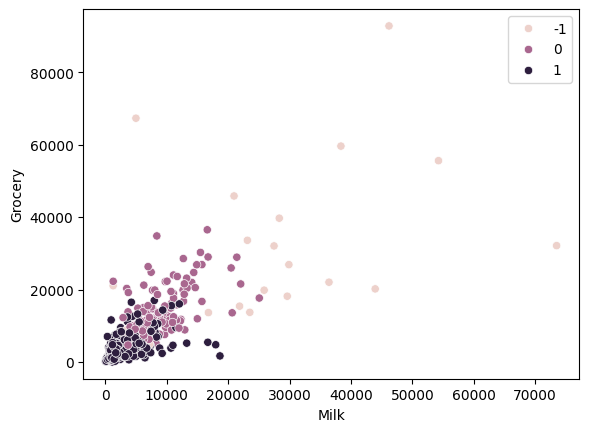

In [20]:
dbscan = DBSCAN(2, min_samples=2*df.shape[1])
dbscan.fit(X_scaled)

sns.scatterplot(df, x='Milk', y='Grocery', hue=dbscan.labels_)

<Axes: xlabel='Milk', ylabel='Detergents_Paper'>

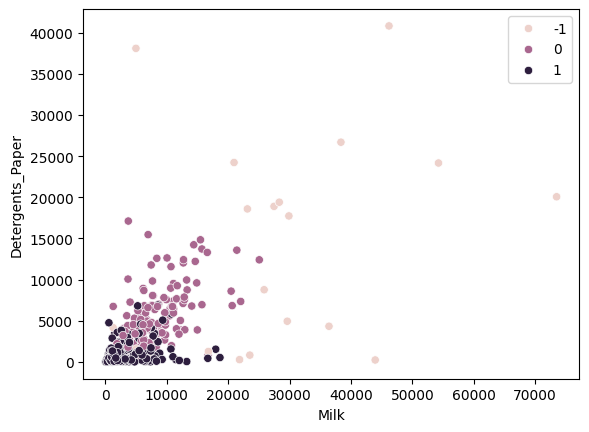

In [22]:
sns.scatterplot(df, x='Milk', y='Detergents_Paper', hue=dbscan.labels_)

In [23]:
df['Labels'] = dbscan.labels_
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [26]:
df.drop(['Region', 'Channel'], axis=1).groupby('Labels').mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


In [31]:
min_max_scaler = MinMaxScaler()
data = min_max_scaler.fit_transform(df.drop(['Region', 'Channel'], axis=1).groupby('Labels').mean())
scaled_means = pd.DataFrame(data, index=df.drop(['Region', 'Channel'], axis=1).groupby('Labels').mean().index, columns=df.drop(['Region', 'Channel'], axis=1).groupby('Labels').mean().columns)
scaled_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.280408,0.444551,0.000000,0.500087,0.073741
1,0.210196,0.000000,0.000000,0.166475,0.000000,0.000000


<Axes: ylabel='Labels'>

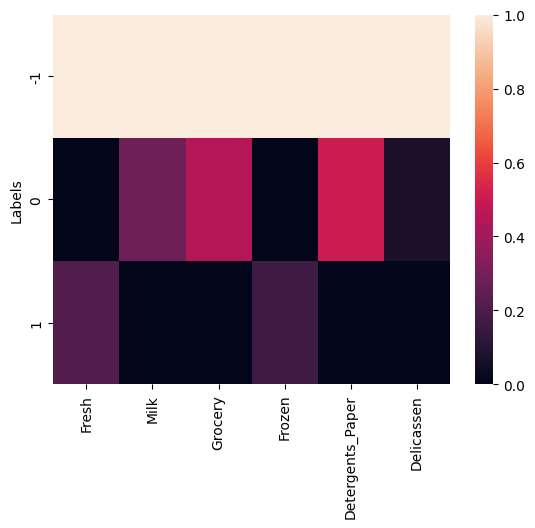

In [32]:
sns.heatmap(scaled_means)

<Axes: ylabel='Labels'>

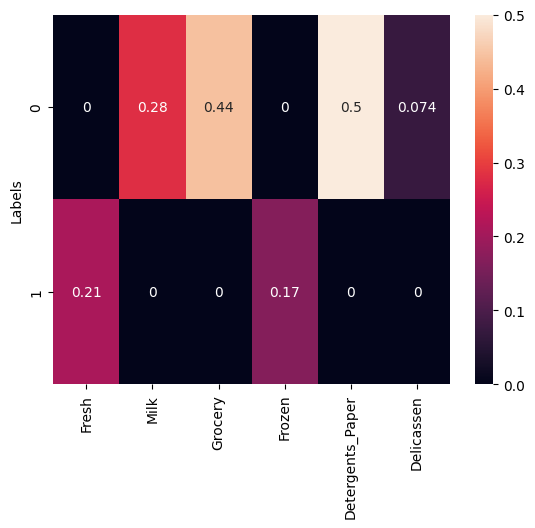

In [36]:
sns.heatmap(scaled_means.loc[[0,1]], annot=True)